In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV # For hyperparameter tuning
import matplotlib.pyplot as plt
import seaborn as sns


try:
    df = pd.read_csv('college_student_placement_dataset.csv')
    print("Dataset loaded successfully.\n")
except FileNotFoundError:
    print("Error: 'college_student_placement_dataset.csv' not found. Please ensure the file is in the correct directory.")
    
    exit()


print("Initial Data Info:")
df.info()
print("\nFirst 5 rows:")
print(df.head())

Dataset loaded successfully.

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB

First 5 rows:
  College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0    CLG0030  107             6.61  6.28                     8

In [79]:
df = df.drop('College_ID', axis=1)
print("\n'College_ID' column dropped.")

le_internship = LabelEncoder()
df['Internship_Experience'] = le_internship.fit_transform(df['Internship_Experience'])
print(f"Internship_Experience mapping: {list(le_internship.classes_)} -> {le_internship.transform(le_internship.classes_)}")

le_placement = LabelEncoder()
df['Placement'] = le_placement.fit_transform(df['Placement'])
print(f"Placement mapping: {list(le_placement.classes_)} -> {le_placement.transform(le_placement.classes_)}")

X = df.drop('Placement', axis=1) # Features are all columns except 'Placement'
y = df['Placement']               # Target is the 'Placement' column

print("\nFeatures (X) and Target (y) defined.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nData split into training (80%) and testing (20%) sets.")
print(f"Shape of X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}, y_test: {y_test.shape}")

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nNumerical features scaled using StandardScaler.")
print("X_train (first 3 rows after scaling):\n", X_train.head(3))


'College_ID' column dropped.
Internship_Experience mapping: ['No', 'Yes'] -> [0 1]
Placement mapping: ['No', 'Yes'] -> [0 1]

Features (X) and Target (y) defined.

Data split into training (80%) and testing (20%) sets.
Shape of X_train: (8000, 8), y_train: (8000,)
Shape of X_test: (2000, 8), y_test: (2000,)

Numerical features scaled using StandardScaler.
X_train (first 3 rows after scaling):
          IQ  Prev_Sem_Result      CGPA  Academic_Performance  \
0 -0.431454        -0.892559 -0.794190              0.154948   
1 -1.554192         1.096493  1.365061              0.154948   
2  0.823372        -1.009968 -0.902832              1.201596   

   Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0              -0.808018               -0.301619             -1.226792   
1              -0.808018                0.332784              1.524441   
2               1.237597               -0.618820             -0.882888   

   Projects_Completed  
0            0.288106  


In [80]:
print("\n--- Training RandomForestClassifier ---")
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)
print("RandomForestClassifier model trained successfully.")


--- Training RandomForestClassifier ---
RandomForestClassifier model trained successfully.



--- RandomForestClassifier Model Evaluation ---
Accuracy: 0.9990
Precision: 1.0000
Recall: 0.9940
F1-Score: 0.9970
ROC-AUC Score: 1.0000

Confusion Matrix:
[[1668    0]
 [   2  330]]


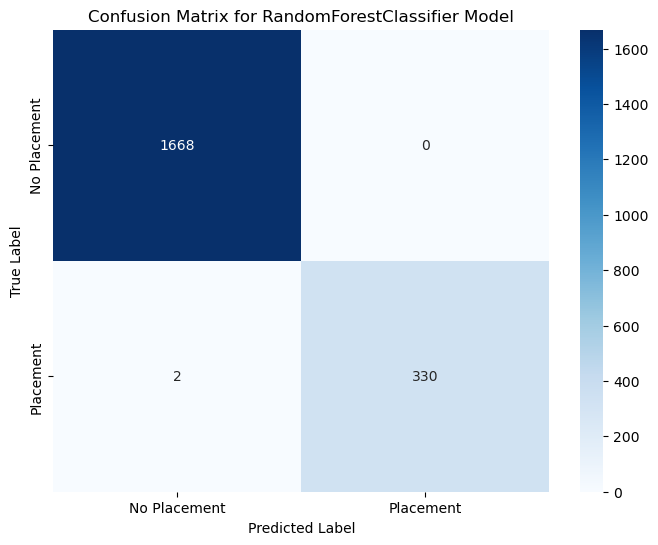

In [81]:
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1] # Probabilities for the positive class

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"\n--- RandomForestClassifier Model Evaluation ---")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"ROC-AUC Score: {roc_auc_rf:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Placement', 'Placement'],
            yticklabels=['No Placement', 'Placement'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for RandomForestClassifier Model')
plt.show()

In [82]:
print("\n--- Starting Hyperparameter Tuning for RandomForestClassifier ---")

param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,            # 5-fold cross-validation
                           scoring='f1',    # Optimize for F1-score
                           n_jobs=-1,       # Use all available CPU cores
                           verbose=1)       # Display progress messages

grid_search.fit(X_train, y_train)

print("\nHyperparameter tuning complete.")
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best F1-score from cross-validation: {grid_search.best_score_:.4f}")

best_rf_model = grid_search.best_estimator_


--- Starting Hyperparameter Tuning for RandomForestClassifier ---
Fitting 5 folds for each of 81 candidates, totalling 405 fits

Hyperparameter tuning complete.
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1-score from cross-validation: 0.9985



--- Evaluating Best RandomForestClassifier Model ---

Best RandomForestClassifier Model Evaluation Metrics:
Accuracy: 0.9985
Precision: 1.0000
Recall: 0.9910
F1-Score: 0.9955
ROC-AUC Score: 1.0000

Confusion Matrix for Best Model:
[[1668    0]
 [   3  329]]


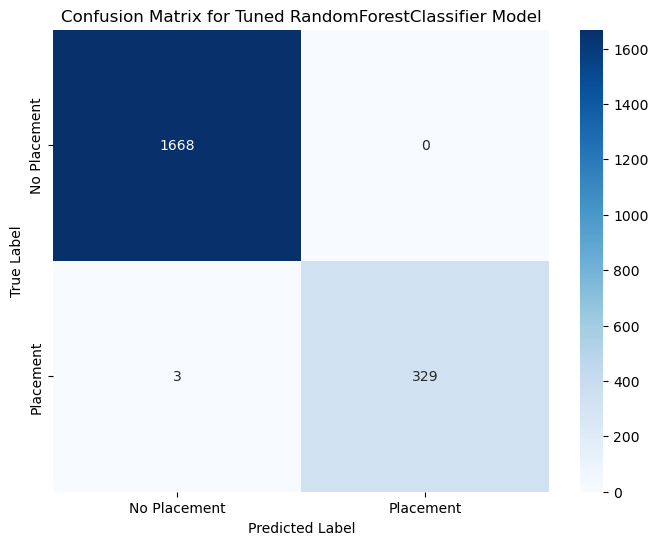

In [84]:
print("\n--- Evaluating Best RandomForestClassifier Model ---")

y_pred_best_rf = best_rf_model.predict(X_test)
y_pred_proba_best_rf = best_rf_model.predict_proba(X_test)[:, 1]


accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)
roc_auc_best_rf = roc_auc_score(y_test, y_pred_proba_best_rf)
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)

print(f"Accuracy: {accuracy_best_rf:.4f}")
print(f"Precision: {precision_best_rf:.4f}")
print(f"Recall: {recall_best_rf:.4f}")
print(f"F1-Score: {f1_best_rf:.4f}")
print(f"ROC-AUC Score: {roc_auc_best_rf:.4f}")

print("\nConfusion Matrix for Best Model:")
print(conf_matrix_best_rf)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Placement', 'Placement'],
            yticklabels=['No Placement', 'Placement'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Tuned RandomForestClassifier Model')
plt.show()